In [30]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
DIR = '/raj/UT-Masters/Fall2019/MachineLearning/project/'
FILE = DIR + 'New_Intent_dataset.csv'

In [3]:
FILE

'/raj/UT-Masters/Fall2019/MachineLearning/project/New_Intent_dataset.csv'

In [4]:
df = pd.read_csv(FILE)

In [5]:
df.head()

,oos_val0,oos_val1,val0,val1,train0,train1,oos_test0,oos_test1,test0,test1,oos_train0,oos_train1
0,set a warning for when my bank account starts ...,oos,"in spanish, meet me tomorrow is said how",translate,what expression would i use to say i love you ...,translate,how much has the dow changed today,oos,how would you say fly in italian,translate,how much is an overdraft fee for bank,oos
1,a show on broadway,oos,"in french, how do i say, see you later",translate,can you tell me how to say 'i do not speak muc...,translate,how many prime numbers are there between 0 and...,oos,what's the spanish word for pasta,translate,why are exponents preformed before multiplicat...,oos
2,who has the best record in the nfl,oos,how do you say hello in japanese,translate,"what is the equivalent of, 'life is good' in f...",translate,can you tell me how to solve simple algebraic ...,oos,how would they say butter in zambia,translate,what size wipers does this car take,oos
3,how do i find the area of a circle,oos,how do i ask about the weather in chinese,translate,"tell me how to say, 'it is a beautiful morning...",translate,can you dim the brightness of my screen,oos,how do you say fast in spanish,translate,where is the dipstick,oos
4,how many onions do i have on hand,oos,"how can i say ""cancel my order"" in french",translate,"if i were mongolian, how would i say that i am...",translate,what is the account number to the internet ser...,oos,what's the word for trees in norway,translate,how much is 1 share of aapl,oos


In [6]:
df.shape

(15000, 12)

In [7]:
print("Total number of itents {}".format(len(df[['train1']].train1.unique())))
print(df[['train1']].train1.unique())

Total number of itents 150
['translate' 'transfer' 'timer' 'definition' 'meaning_of_life'
 'insurance_change' 'find_phone' 'travel_alert' 'pto_request'
 'improve_credit_score' 'fun_fact' 'change_language' 'payday'
 'replacement_card_duration' 'time' 'application_status' 'flight_status'
 'flip_coin' 'change_user_name' 'where_are_you_from'
 'shopping_list_update' 'what_can_i_ask_you' 'maybe' 'oil_change_how'
 'restaurant_reservation' 'balance' 'confirm_reservation' 'freeze_account'
 'rollover_401k' 'who_made_you' 'distance' 'user_name' 'timezone'
 'next_song' 'transactions' 'restaurant_suggestion' 'rewards_balance'
 'pay_bill' 'spending_history' 'pto_request_status' 'credit_score'
 'new_card' 'lost_luggage' 'repeat' 'mpg' 'oil_change_when' 'yes'
 'travel_suggestion' 'insurance' 'todo_list_update' 'reminder'
 'change_speed' 'tire_pressure' 'no' 'apr' 'nutrition_info' 'calendar'
 'uber' 'calculator' 'date' 'carry_on' 'pto_used' 'schedule_maintenance'
 'travel_notification' 'sync_device' 't

In [8]:
df[['train1','train0']].groupby(['train1']).count()

,train0
train1,
accept_reservations,100
account_blocked,100
alarm,100
application_status,100
apr,100
...,...
where_are_you_from,100
whisper_mode,100
who_do_you_work_for,100


# Banking related classes

In [9]:
intents = ['transfer','improve_credit_score','replacement_card_duration','application_status',
           'balance','freeze_account','transactions','spending_history','rewards_balance',
           'credit_score','new_card','report_lost_card','damaged_card',
           'bill_due','exchange_rate','credit_limit','account_blocked',
           'report_fraud','direct_deposit','interest_rate','credit_limit_change',
           'bill_balance','order_checks','card_declined','expiration_date']
print("Number of intents related to banking domain {}".format(len(intents)))

Number of intents related to banking domain 25


In [10]:
intents_map = {'transfer':0,
'improve_credit_score':1,
'replacement_card_duration':2,
'application_status':3,
 'balance':4,
'freeze_account':5,
'transactions':6,
'spending_history':7,
'rewards_balance':8,
 'credit_score':9,
'new_card':10,
'report_lost_card':11,
'damaged_card':12,
 'bill_due':13,
'exchange_rate':14,
'credit_limit':15,
'account_blocked':16,
 'report_fraud':17,
'direct_deposit':18,
'interest_rate':19,
'credit_limit_change':20,
 'bill_balance':21,
'order_checks':22,
'card_declined':23,
'expiration_date':24}

# Extract the data

## Training set

In [32]:
train_df = None
for intent in intents:
    train_df=pd.concat([train_df,df.loc[df['train1'] == intent][['train0','train1']]])    

In [33]:
train_df.shape

(2500, 2)

In [34]:
train_df

,train0,train1
100,i need $20000 transferred from my savings to m...,transfer
101,complete a transaction from savings to checkin...,transfer
102,transfer $20000 from my savings account to che...,transfer
103,take $20000 from savings and put it in checking,transfer
104,put $20000 into my checking account from my sa...,transfer
...,...,...
13595,how long do i've got until my discovery card e...,expiration_date
13596,when should i expect my visa to expire,expiration_date
13597,how long until my visa expires,expiration_date
13598,find out for me when my mastercard expires,expiration_date


In [35]:
train_df[['train1','train0']].groupby(['train1']).count()

,train0
train1,
account_blocked,100
application_status,100
balance,100
bill_balance,100
bill_due,100
card_declined,100
credit_limit,100
credit_limit_change,100
credit_score,100


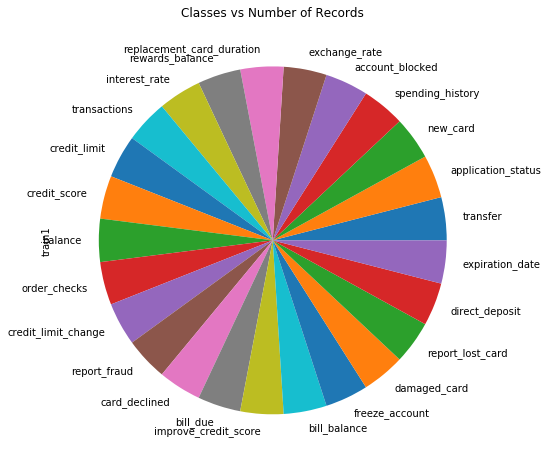

In [40]:
ax = train_df['train1'].value_counts().plot(kind='pie',
                                    figsize=(14,8),
                                    title="Classes vs Number of Records")
#ax.set_xlabel("Classes")
#ax.set_ylabel("Number of Records")

## Validation set

In [15]:
val_df = None
for intent in intents:
    val_df=pd.concat([val_df,df.loc[df['val1'] == intent][['val0','val1']]])    

In [16]:
val_df

,val0,val1
20,transfer ten dollars from my wells fargo accou...,transfer
21,take one hundred and fifty bucks from my wells...,transfer
22,put one hundred and seventy five bucks in my w...,transfer
23,move two hundred dollars to my chase savings a...,transfer
24,move three hundred and fifty dollars from my c...,transfer
...,...,...
2715,when do i need a new credit card,expiration_date
2716,in what month does my credit card expire,expiration_date
2717,when is my credit card set to expire,expiration_date
2718,i need to know when my credit card is going to...,expiration_date


In [17]:
val_df[['val1','val0']].groupby(['val1']).count()

,val0
val1,
account_blocked,20
application_status,20
balance,20
bill_balance,20
bill_due,20
card_declined,20
credit_limit,20
credit_limit_change,20
credit_score,20


## Test set

In [18]:
test_df = None
for intent in intents:
    test_df=pd.concat([test_df,df.loc[df['test1'] == intent][['test0','test1']]])    

In [19]:
test_df

,test0,test1
30,can you please provide me with assistance in m...,transfer
31,i would like help moving money between accounts,transfer
32,can you assist me in moving money from one acc...,transfer
33,i would like help moving money from one accoun...,transfer
34,i would like assistance moving money from one ...,transfer
...,...,...
4075,can you tell me what the date of expiry for my...,expiration_date
4076,tell me the expiration date for my visa card,expiration_date
4077,show me the expiration date for my visa card,expiration_date
4078,where should i look for my credit card expirat...,expiration_date


In [20]:
test_df[['test1','test0']].groupby(['test1']).count()

,test0
test1,
account_blocked,30
application_status,30
balance,30
bill_balance,30
bill_due,30
card_declined,30
credit_limit,30
credit_limit_change,30
credit_score,30


In [21]:
train_df.rename(columns={'train0': 'text', 'train1': 'label'}, inplace=True)
val_df.rename(columns={'val0': 'text', 'val1': 'label'}, inplace=True)
test_df.rename(columns={'test0': 'text', 'test1': 'label'}, inplace=True)

In [22]:
train_df

,text,label
100,i need $20000 transferred from my savings to m...,transfer
101,complete a transaction from savings to checkin...,transfer
102,transfer $20000 from my savings account to che...,transfer
103,take $20000 from savings and put it in checking,transfer
104,put $20000 into my checking account from my sa...,transfer
...,...,...
13595,how long do i've got until my discovery card e...,expiration_date
13596,when should i expect my visa to expire,expiration_date
13597,how long until my visa expires,expiration_date
13598,find out for me when my mastercard expires,expiration_date


In [23]:
val_df

,text,label
20,transfer ten dollars from my wells fargo accou...,transfer
21,take one hundred and fifty bucks from my wells...,transfer
22,put one hundred and seventy five bucks in my w...,transfer
23,move two hundred dollars to my chase savings a...,transfer
24,move three hundred and fifty dollars from my c...,transfer
...,...,...
2715,when do i need a new credit card,expiration_date
2716,in what month does my credit card expire,expiration_date
2717,when is my credit card set to expire,expiration_date
2718,i need to know when my credit card is going to...,expiration_date


In [24]:
test_df

,text,label
30,can you please provide me with assistance in m...,transfer
31,i would like help moving money between accounts,transfer
32,can you assist me in moving money from one acc...,transfer
33,i would like help moving money from one accoun...,transfer
34,i would like assistance moving money from one ...,transfer
...,...,...
4075,can you tell me what the date of expiry for my...,expiration_date
4076,tell me the expiration date for my visa card,expiration_date
4077,show me the expiration date for my visa card,expiration_date
4078,where should i look for my credit card expirat...,expiration_date


## Write to CSV

In [25]:
train_df.to_csv(DIR+'train.csv',index=False)
val_df.to_csv(DIR+'val.csv',index=False)
test_df.to_csv(DIR+'test.csv',index=False)

In [26]:
train_df['label'] = train_df['label'].apply(intents_map.get)
val_df['label'] = val_df['label'].apply(intents_map.get)
test_df['label'] = test_df['label'].apply(intents_map.get)

In [27]:
train_df.to_csv(DIR+'train_enc.csv',index=False)
val_df.to_csv(DIR+'val_enc.csv',index=False)
test_df.to_csv(DIR+'test_enc.csv',index=False)

In [28]:
train_df

,text,label
100,i need $20000 transferred from my savings to m...,0
101,complete a transaction from savings to checkin...,0
102,transfer $20000 from my savings account to che...,0
103,take $20000 from savings and put it in checking,0
104,put $20000 into my checking account from my sa...,0
...,...,...
13595,how long do i've got until my discovery card e...,24
13596,when should i expect my visa to expire,24
13597,how long until my visa expires,24
13598,find out for me when my mastercard expires,24
